<a href="https://colab.research.google.com/github/MunipsJe/My-works/blob/main/Linearpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for frame work
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# checking the version
torch.__version__

'2.6.0+cu124'

In [ ]:
#Setup device diagnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


In [ ]:
# creating data for linear regression formula y= weight*X +bias
weight =0.7
bias =0.3
#create range values
start =0
end =1
step=0.02
# Create X and Y features(features and lables)
X= torch.arange(start, end, step).unsqueeze(dim=1) #wihtout unsqueeze error will popup
y=weight* X +bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split the data
train_split=int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test= X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

<ipython-input-6-3dd99c74f68e>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={"size": 14});


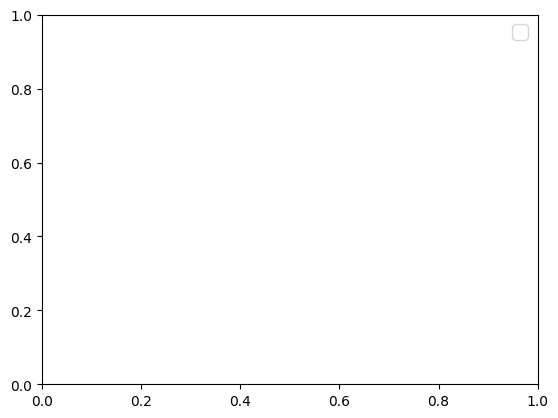

In [ ]:
# function for plotting
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data =X_test,
                     test_lables =y_test,
                     predictions =None):
  #Plotting the test and train data
  plt.figure(figsize=(10,7))

  #plotting the training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4, label="Training data")

  #plotting the test data in green
  plt.scatter(test_data,test_lables,c="g",s=4, label="Testing data")

  #Are there predcitions
  if predictions is not None :
    #plot the prediction if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predction")

 # show the legend
plt.legend(prop={"size": 14});

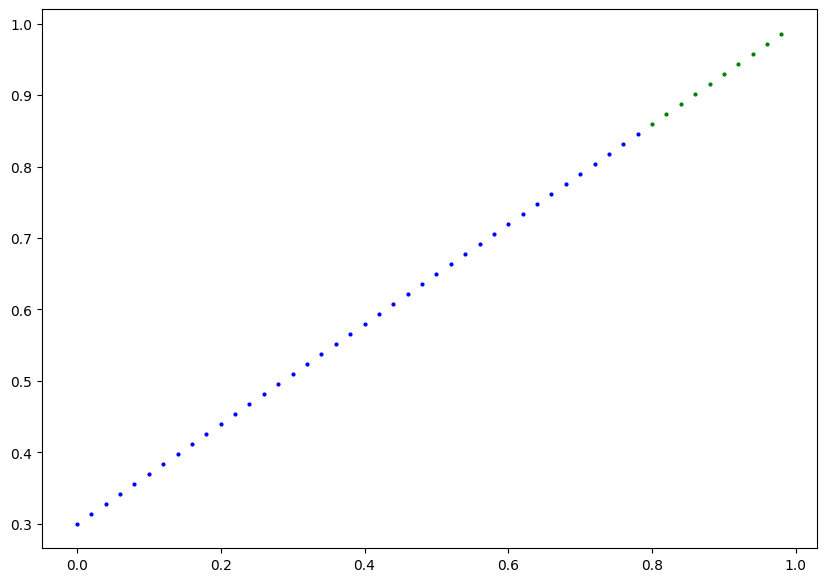

In [ ]:
#plot the data
#Note : if you dont have the plot_prediction function loaded this will error
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
# Builiding the pytorch model for linear model
#Create a Linear model by some subcalssing .nn.module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.linear() for creating the model parameters /also called Linear trasnform , probing layer, fully connect layer
    self.linear_layer= nn.Linear(in_features =1,
                                 out_features=1)# Applies linear transformation to incoming data
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1=LinearRegression()
model_1,model_1.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# training code
# For training
#1.Loss function,2.Optimizer, 3.Training Loop, 4.Testing Loop

# Setup the loss function
loss_fn=nn.L1Loss() # sme as MSE

#Set up optimizer
optimizer =torch.optim.SGD(params = model_1.parameters(),lr=0.01)

#Lets write the training loop
torch.manual_seed(42)

#epochs
epochs=200

for epoch in range(epochs):
  #training
  model_1.train()

  #1.forward pass
  y_pred =model_1(X_train)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.perform backpropagation
  loss.backward()

  #5.optimizer step
  optimizer.step()


  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred =model_1(X_test)

    test_loss= loss_fn(test_pred,y_test)

    #Printout what's happenning

  if epoch % 10 == 0:
    print(f"Epoch:{epoch}| Loss:{loss} | test loss:{test_loss}")

Epoch:0| Loss:0.5551779866218567 | test loss:0.5739762187004089
Epoch:10| Loss:0.4399680495262146 | test loss:0.4392663538455963
Epoch:20| Loss:0.3247582018375397 | test loss:0.30455657839775085
Epoch:30| Loss:0.20954827964305878 | test loss:0.16984674334526062
Epoch:40| Loss:0.09433844685554504 | test loss:0.03513689711689949
Epoch:50| Loss:0.023886386305093765 | test loss:0.04784906655550003
Epoch:60| Loss:0.0199567973613739 | test loss:0.04580312222242355
Epoch:70| Loss:0.016517987474799156 | test loss:0.0375305712223053
Epoch:80| Loss:0.013089170679450035 | test loss:0.029944902285933495
Epoch:90| Loss:0.009653178043663502 | test loss:0.02167237363755703
Epoch:100| Loss:0.006215679459273815 | test loss:0.014086711220443249
Epoch:110| Loss:0.002787243574857712 | test loss:0.005814164876937866
Epoch:120| Loss:0.0012645035749301314 | test loss:0.013801807537674904
Epoch:130| Loss:0.0012645035749301314 | test loss:0.013801807537674904
Epoch:140| Loss:0.0012645035749301314 | test loss:0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#Turn model into evalutation mode
model_1.eval()

# make prediction on the test data
with torch.inference_mode():
  y_pred=model_1(X_test)

y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

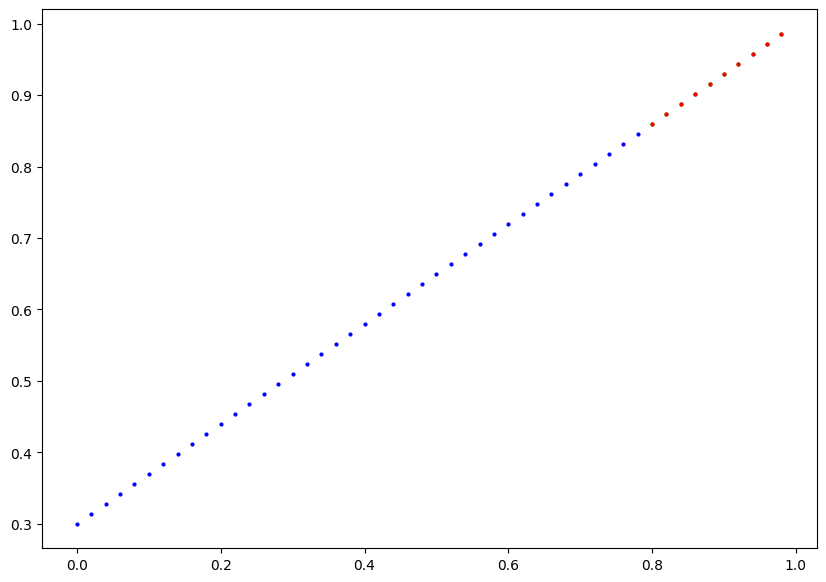

In [ ]:
# Check out the model prediction visually
plot_predictions(predictions=y_pred)

In [ ]:
# Saving and loading trained model
from pathlib import Path

# create the model directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2.Cretae model save path
MODEL_NAME="01_pytorch_workfloe_model1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workfloe_model1.pth')

In [ ]:
#Save thecmodel
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workfloe_model1.pth


In [ ]:
#Load the pytorch
loaded_model_1= LinearRegression()


#Loadede the saved model1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#evaluation
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_pred=loaded_model_1(X_test)

y_pred == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])